# Using the webcam to capture an image in python

This code just illustrates how python captures an image from the webcam and then displays it. To achieve this, the opencv2 library is being used. The image captured using `cv2` is in BGR `frame[:,:,::-1]` converts it to RGB so that it is displayed correctly.

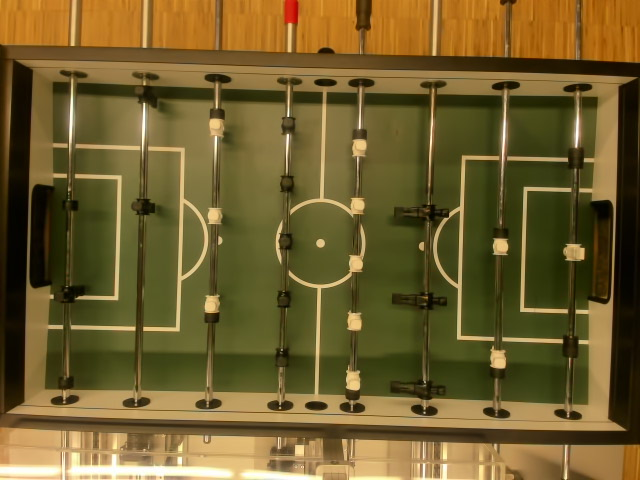

In [1]:
import cv2
from PIL import Image
import numpy as np

video = cv2.VideoCapture(1)
error, frame = video.read()
Image.fromarray(frame[:,:,::-1])

# Determine the frame rate without analyzing the neural net

The following code determines the basic frame rate, that can be achieved by using python and fetching the camera stream.

In [4]:
import time
time_start = time.time()

count = 180

for _ in range(count):
    video.read()

print('FPS {}'.format(float(count) / (time.time() - time_start)))

FPS 30.4713920755


# Determining the frame rate using the neural net

In order to use the neural net, we first need to set up some initialization code. Then we can use it to determine the possible frame rate.

In [5]:
from kicker.neural_net import NeuralNet
nn = NeuralNet(24, (320, 480, 2))

Using TensorFlow backend.


The playing field is extracted using the following routine.

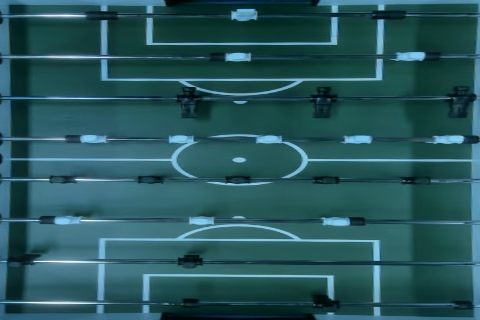

In [6]:
from kicker.image import Analyzer
import yaml

with open('../config.yml', 'r') as f:
    config =  yaml.load(f)
    
analyzer = Analyzer(config)
Image.fromarray(analyzer.extract_table(frame, (480, 320)))

We are now ready to measure the FPS while applying the neural net.

In order to use the full power of the Jetson, one needs to run `sudo ~/jetson_clocks.sh`, which basically tells the underlying Jetson to use all available computing resources.

In [7]:
def capture_single():
    error, frame = video.read()
    table_frame = analyzer.extract_table(frame, (480, 320))
    nn.predict_single(table_frame[:,:,:2].reshape((1, 480, 320, 2)))

capture_single() # This is required in order to warm-

time_start = time.time()

count = 180

for _ in range(count):
    capture_single()

print('FPS {}'.format(float(count) / (time.time() - time_start)))

FPS 30.540687788


# Webcam settings

The following illustrates the current settings of the webcam. These can be either set using the graphical tool `guvcview -d /dev/video1` or through appropriate use of the `v4l2-ctl` command line tool.

In [6]:
!v4l2-ctl -d /dev/video1 --all

Driver Info (not using libv4l2):
	Driver name   : uvcvideo
	Card type     : Logitech BRIO
	Bus info      : usb-70090000.xusb-3.4
	Driver version: 4.4.38
	Capabilities  : 0x84200001
		Video Capture
		Streaming
		Extended Pix Format
		Device Capabilities
	Device Caps   : 0x04200001
		Video Capture
		Streaming
		Extended Pix Format
Priority: 2
Video input : 0 (Camera 1: ok)
Format Video Capture:
	Width/Height      : 640/480
	Pixel Format      : 'MJPG'
	Field             : None
	Bytes per Line    : 0
	Size Image        : 614400
	Colorspace        : sRGB
	Transfer Function : Default
	YCbCr Encoding    : Default
	Quantization      : Default
	Flags             : 
Crop Capability Video Capture:
	Bounds      : Left 0, Top 0, Width 640, Height 480
	Default     : Left 0, Top 0, Width 640, Height 480
	Pixel Aspect: 1/1
Selection: crop_default, Left 0, Top 0, Width 640, Height 480
Selection: crop_bounds, Left 0, Top 0, Width 640, Height 480
Streaming Parameters Video Capture:
	Capabilities     : ti